In [1]:
import seaborn as sns
#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values #종속변수
print(y[:5])
encoder=LabelEncoder() #문자열에 label을 붙임
y1=encoder.fit_transform(y)
print(y1[:5])
y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [4]:
from sklearn.model_selection import train_test_split
#학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
#모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.1398 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0207 - accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9433 - accuracy: 0.4417
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8687 - accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.7417
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7418 - accuracy: 0.8333
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.8417
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.8250
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.8167
Epoch 11/100
4/4 [===========

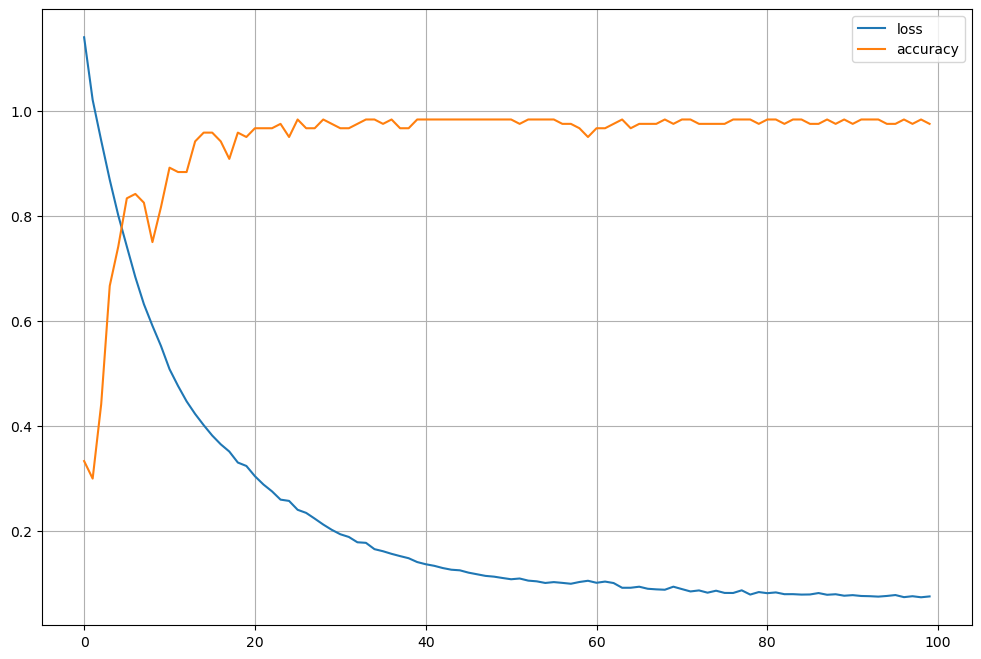

In [8]:
import matplotlib.pyplot as plt
#그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [9]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 1.00


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(pred[:10])
y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 75ms/step
[[9.4661448e-04 8.7300754e-01 1.2604584e-01]
 [9.9620014e-01 3.7998052e-03 5.2091393e-09]
 [6.4712041e-04 5.2658433e-01 4.7276857e-01]
 [1.8599426e-04 3.2172716e-01 6.7808688e-01]
 [9.3382429e-03 9.8758954e-01 3.0722476e-03]
 [2.8654094e-05 5.6310859e-02 9.4366056e-01]
 [9.9676067e-01 3.2393178e-03 1.0642524e-08]
 [3.0236558e-06 5.0884569e-03 9.9490851e-01]
 [1.4492516e-06 4.1779466e-03 9.9582064e-01]
 [9.9979764e-01 2.0239328e-04 1.3712718e-11]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [11]:
model.save('c:/data/iris')

INFO:tensorflow:Assets written to: c:/data/iris\assets
